# Computational Physics: Assignment 1

## Problem 1: Ramanujan-Hardy Taxi

One day, the English mathematician G. H. Hardy came to visit Ramanujan and remarked that his taxi had a dull number; it was 1729. Ramanujan replied, 'No! It is a very interesting number because it is the smallest number expressible as the sum of two cubes in two different ways.'
Write an interactive program to verify this. Input is an integer N. Find distinct positive integers $p$, $q$, $r$, and $s$ such that $p^{3} + q^{3} = r^{3} + s^{3}$, and the sum is less than or equal to $N$.

<hr>

### Algorithm Used:
We need to find distinct positive integers \( p, q, r, s \) such that:

$p^3 + q^3 = r^3 + s^3 \leq N$

1. Creating a dictionary (`d`) that will store sums of two cubes as keys and the corresponding pairs (p, q) as values; the `final` list will store all the filtered so-called taxicab numbers lesser than or equal to $N$
2. Looping over *p* from 1 to $\sqrt[3]{N}$
3. Looping over *q* from $p + 1$ to $\sqrt[3]{N}$ (ensuring $p \neq q$)  
4. Evaluating $p^{3} + q^{3}$. If the sum exceeds $N$, break
5. Storing the sum in a dictionary. If the sum already exists in `d`, append the new pair $(p, q)$, if not, create a new entry
6. Iterating through `d` and check if any sum appears with at least two distinct pairs, the first such sum is our answer.

In [27]:
def ramanujan_hardy(N):
    d, final = dict(), [] # d is like the master list that contains all the numbers and their corresponding p-q pair(s)
    for p in range(1, int(N ** (1/3)) + 1):
        for q in range(p + 1, int(N ** (1/3)) + 1):
            cube_sum = p**3 + q**3
            if cube_sum > N:
                break
            if cube_sum in d:
                d[cube_sum].append((p, q)) 
            else:
                d[cube_sum] = [(p, q)]

    for num in sorted(d.keys()):
        if len(d[num]) == 2:
            final.append([num, d[num]]) 
            # filtering out the numbers with two ways to be expressed as sum of cubes and appending to final list

    for i in final:
        print(i)

    return None

In [30]:
N = int(input('Enter number N: '))
ramanujan_hardy(N)

Enter number N:  142940


[1729, [(1, 12), (9, 10)]]
[4104, [(2, 16), (9, 15)]]
[13832, [(2, 24), (18, 20)]]
[20683, [(10, 27), (19, 24)]]
[32832, [(4, 32), (18, 30)]]
[39312, [(2, 34), (15, 33)]]
[40033, [(9, 34), (16, 33)]]
[46683, [(3, 36), (27, 30)]]
[64232, [(17, 39), (26, 36)]]
[65728, [(12, 40), (31, 33)]]
[110656, [(4, 48), (36, 40)]]
[110808, [(6, 48), (27, 45)]]
[134379, [(12, 51), (38, 43)]]


Here, 1729 is clearly the smallest number that can be expressed this way.

## Problem 2: GCD
Write a recursive program (interactive) to find the gcd of two integers. The input would be two integers.

<hr>

### Algorithm Used:

The iterative/Euclidean approach typically involves running a while loop until one of the numbers is zero and setting $x$, $y$ = $y$, $x \text{ mod } y$. This has been converted to a recursive algorithm below.

In [37]:
def gcd(x, y):
    if y == 0:
        return x
    return (gcd(y, x % y))  

In [38]:
print(gcd(20, 30))

10


## Problem 3: Newton-Raphson in the Complex Plane

Take the points on a lattice in the complex plane, $z = x + iy, −2 < x, y < +2$, as initial points and monitor the iterations of
the Newton-Raphson formula for $z^{3} = 1$. Classify the initial points by the root they converge to and plot them using different colours. If possible magnify (i.e. by using a finer grid) any interesting region of the plot.

<hr>

### Algorithm Used:

I have essentially used the method similar to the I applied in Lecture 8 in the notebook for the course: https://github.com/LoopyNoodle/Computational-Physics/blob/main/Lecture_8.ipynb (except there I generalised to any power of $n$ and here I have written a function to plot the fractals as I am plotting the finer grid too). For the function $f(z) = z^{3} - 1$, in the real space, there is only one root (1). However, if we include complex numbers too, we have three roots - 1, $-\frac{1}{2} \pm \frac{3}{2}i$. We can start from an initial point $z_{0}$, and we have $f'(x) = 3z^{2}$. So, by Newton-Raphson method,

$z_{1} = z_{0} - \frac{z^{3} - 1}{3z^{2}}$,

and we can calculate further terms like $z_{2}, z_{3}, \dots$

Then, we create a 2D grid in the complex plane and store which root each point converges to and how many iterations it takes, and finally plot them.

Depending on the initial choice of $z_0$, the iteration converges to one of the three roots, and when we plot this so-called basin of attraction, we get a fractal-like pattern. The fractal boundary appears because points near the boundary of basins of attraction exhibit chaotic behaviour as small changes in the initial condition $z_0$ leads to different roots.

In [39]:
import numpy as np
import matplotlib.pyplot as plt

In [47]:
def f(z):
    return z**3 - 1

def df(z):
    return 3*z**2

In [48]:
def nr_comp(z, tol = 1e-6, max_iter = 200):
    for i in range(max_iter):
        fz, dfz = f(z), df(z)
        z_next = z - (fz/df(z))
        if abs(dfz) < tol:
            return None, i # checking derivative near critical points as we got gaps in the plot before
        if abs(z_next - z) < tol: # checking if the error is lower than tolerance
            return z_next, i
        z = z_next
    return None, max_iter

In [61]:
# generating the fractals
def fractal_gen(x_range, y_range, n_samples, max_iter = 200):
    x_val = np.linspace(x_range[0], x_range[1], n_samples)
    y_val = np.linspace(y_range[0], y_range[1], n_samples)
    X, Y = np.meshgrid(x_val, y_val)
    Z = X + 1j * Y # complex grid

    roots = [np.exp(2j * np.pi * k/3) for k in range(3)]
    root_ind = np.full(Z.shape, -1)  # stores the index of which root each point converges to
    iters = np.zeros(Z.shape) # no of iterations needed to reach the root

    for i in range(n_samples):
        for j in range(n_samples):
            root, iterss = nr_comp(Z[i, j])
            iters[i, j] = iterss # storing iteration count
            if root is not None:
                root_ind[i, j] = np.argmin(np.abs(roots - root)) # finding the closest root reached

    div = iters >= max_iter - 1  # True marks the points that fail to converge
    return X, Y, root_ind, div, roots

In [67]:
def plot(x_range, y_range, n_samples):
    X, Y, root_ind, div, roots = fractal_gen(x_range, y_range, n_samples)

    plt.figure(figsize = (8, 8))
    plt.imshow(root_ind, cmap = colourmap, origin = 'lower', extent = [*x_range, *y_range])
    
    # divergence points/critical points - contour lines instead of gaps
    plt.contour(X, Y, div, levels = [0.5], colors = 'white', linewidths = 0.5)

    
    if x_range == (-2, 2) and y_range == (-2, 2):
        j = ['k', 'midnightblue', 'darkslateblue']
        for i, r in enumerate(roots):
            plt.scatter(r.real, r.imag, color = j[i], s = 50, label = str(round(r.real, 3)) + ' + ' + str(round(r.imag, 3)) + 'i')
    
    plt.title(f"Newton's Fractal for $f(z) = z^{3} - 1$")
    plt.legend()
    plt.xlabel('Re(z)')
    plt.ylabel('Im(z)')
    plt.show()

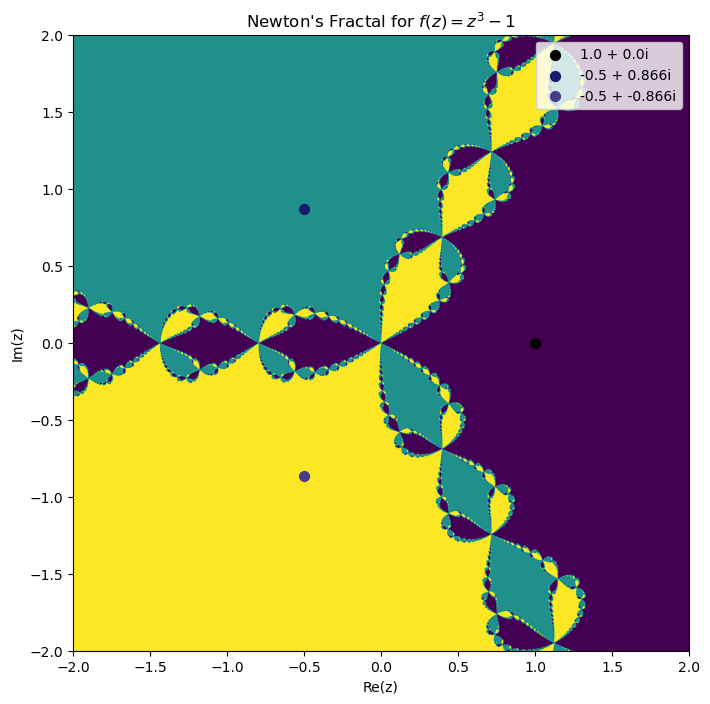

In [68]:
plot(x_range = (-2, 2), y_range = (-2, 2), n_samples = 2000)

/tmp/ipykernel_4141/2053837262.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


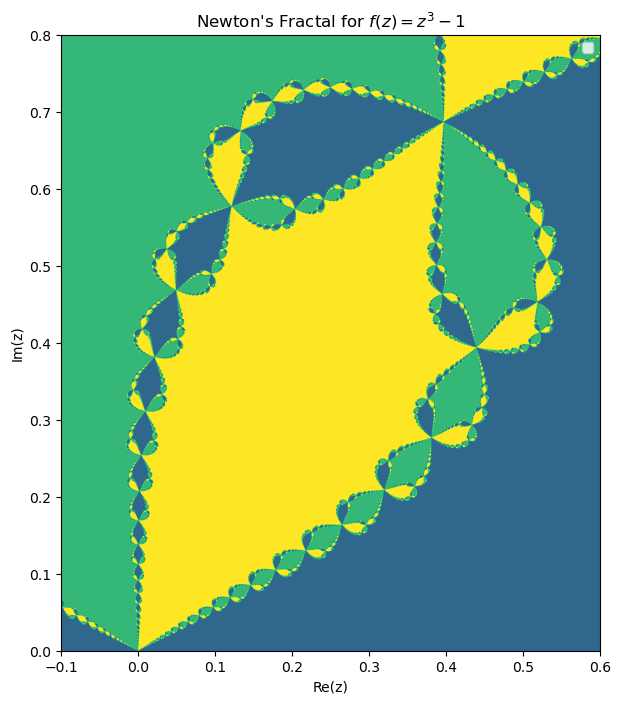

In [72]:
# zoomed-in region
plot(x_range = (-0.1, 0.6), y_range = (0.0, 0.8), n_samples = 2000)